In [3]:
import pandas as pd
import numpy as np

In [ ]:
# delta-delta Ct method
# upper threshold is 30

In [61]:
data = pd.read_csv('q_PCR_CL_1page.csv')[['Well', 'Sample Name', 'Target Name', 'Cт']].sort_values('Target Name')
data = data[data['Cт']<=30]

In [62]:
house_k = 'Target 11'
treat = 'Met'
control = 'DMSO'

In [63]:
delta_list = []
for _, row in data.iterrows():
    delta_list.append(row['Cт'] - float(data[(data['Target Name'] =='Target 11') & (data['Sample Name'] == row['Sample Name'])]['Cт']))
data['delta'] = delta_list

In [64]:
data

,Well,Sample Name,Target Name,Cт,delta
0,A1,DMSO_2x,Target 1,23.604027,5.360991
77,H1,Met_16x,Target 1,29.138084,4.091768
22,C1,DMSO_8x,Target 1,25.503658,6.005114
66,G1,Met_8x,Target 1,28.305235,4.529800
33,D1,DMSO_16x,Target 1,26.620770,5.735924
...,...,...,...,...,...
52,E9,Met_2x,Target 9,24.984888,2.579248
41,D9,DMSO_16x,Target 9,21.222836,0.337990
30,C9,DMSO_8x,Target 9,20.160761,0.662216
85,H9,Met_16x,Target 9,28.228256,3.181940


In [65]:
fc_data = pd.DataFrame(columns=['sample', 'target', 'delta2'])
for _, row in data.iterrows():
    if treat in row['Sample Name']:
        fc_data = fc_data.append({'sample': row['Sample Name'],
                                  'target': row['Target Name'],
                                  'delta2': (row['delta'] - float(data[(data['Target Name'] ==row['Target Name']) & (data['Sample Name'] == control+'_'+row['Sample Name'].split('_')[1])]['delta']))
            
        }, ignore_index = True)

/tmp/ipykernel_25009/2817359318.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_25009/2817359318.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_25009/2817359318.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_25009/2817359318.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_25009/2817359318.py:4: FutureWarning: The frame.append method is depr

/tmp/ipykernel_25009/2817359318.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_25009/2817359318.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_25009/2817359318.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_25009/2817359318.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],


In [66]:
fc_data

,sample,target,delta2
0,Met_16x,Target 1,-1.644156
1,Met_8x,Target 1,-1.475313
2,Met_4x,Target 1,-1.378126
3,Met_2x,Target 1,-1.641125
4,Met_2x,Target 10,0.537298
5,Met_4x,Target 10,1.007027
6,Met_8x,Target 10,0.980091
7,Met_2x,Target 11,0.0
8,Met_4x,Target 11,0.0
9,Met_8x,Target 11,0.0


In [67]:
fc_data['FC'] = 2**(-fc_data['delta2'])
fc_data

,sample,target,delta2,FC
0,Met_16x,Target 1,-1.644156,3.125648
1,Met_8x,Target 1,-1.475313,2.78044
2,Met_4x,Target 1,-1.378126,2.599305
3,Met_2x,Target 1,-1.641125,3.119089
4,Met_2x,Target 10,0.537298,0.68906
5,Met_4x,Target 10,1.007027,0.497571
6,Met_8x,Target 10,0.980091,0.506948
7,Met_2x,Target 11,0.0,1.0
8,Met_4x,Target 11,0.0,1.0
9,Met_8x,Target 11,0.0,1.0


In [68]:
my_dict = {'Target 1':'lexA', 'Target 2':'uvrA', 'Target 3':'uvrB', 'Target 4':'recN', 'Target 5':'ruvA', 'Target 6':'polA', 'Target 7':'nusA','Target 8': 'dnaK', 'Target 9':'recA', 'Target 10':'dinB', 'Target 11':'gyrB'}
fc_data = fc_data.replace({"target": my_dict})
fc_data

,sample,target,delta2,FC
0,Met_16x,lexA,-1.644156,3.125648
1,Met_8x,lexA,-1.475313,2.78044
2,Met_4x,lexA,-1.378126,2.599305
3,Met_2x,lexA,-1.641125,3.119089
4,Met_2x,dinB,0.537298,0.68906
5,Met_4x,dinB,1.007027,0.497571
6,Met_8x,dinB,0.980091,0.506948
7,Met_2x,gyrB,0.0,1.0
8,Met_4x,gyrB,0.0,1.0
9,Met_8x,gyrB,0.0,1.0


In [65]:
fc_data.to_csv('CL_qpcr_29-08-22.csv', index=False)

In [25]:
import seaborn as sns

In [88]:
fc_data["sample"] = pd.Categorical(fc_data["sample"], categories=["Met_2x", "Met_4x", "Met_8x", "Met_16x"])

<AxesSubplot:xlabel='sample', ylabel='FC'>

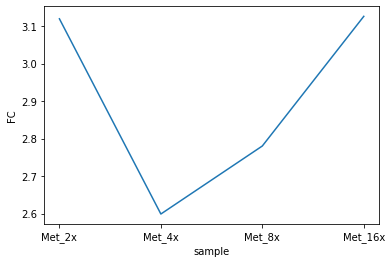

In [90]:
sns.lineplot(data = fc_data[fc_data.target == 'Target 1'], x='sample', y='FC')

# Type

In [39]:
data = pd.read_csv('qPCR_01_09_2022.csv')[['Well', 'Sample Name', 'Target Name', 'Cт']].sort_values('Target Name')
data = data[data['Cт']<=30]
data

,Well,Sample Name,Target Name,Cт
0,A1,met_4x,Target 1,23.492756
69,H1,dmso_4x,Target 1,17.669193
59,G1,dmso_4x,Target 1,17.723028
49,F1,dmso_4x,Target 1,17.977381
29,D1,met_4x,Target 1,23.115936
...,...,...,...,...
37,D9,met_4x,Target 9,24.936670
27,C9,met_4x,Target 9,24.697996
17,B9,met_4x,Target 9,25.646004
57,F9,dmso_4x,Target 9,20.370993


In [40]:
house_k = 'Target 1'
treat = 'met'
control = 'dmso'

In [41]:
data.dtypes

Well            object
Sample Name     object
Target Name     object
Cт             float64
dtype: object

In [42]:
data = data.groupby(['Sample Name','Target Name']).mean().reset_index()

In [43]:
data

,Sample Name,Target Name,Cт
0,dmso_4x,Target 1,17.645336
1,dmso_4x,Target 10,20.605076
2,dmso_4x,Target 2,22.324322
3,dmso_4x,Target 3,18.811391
4,dmso_4x,Target 4,23.003316
5,dmso_4x,Target 5,19.208955
6,dmso_4x,Target 6,17.398557
7,dmso_4x,Target 7,20.258158
8,dmso_4x,Target 8,22.124754
9,dmso_4x,Target 9,20.183473


In [44]:
delta_list = []
for _, row in data.iterrows():
    delta_list.append(row['Cт'] - float(data[(data['Target Name'] == 'Target 1') & (data['Sample Name'] == row['Sample Name'])]['Cт']))
data['delta'] = delta_list

In [45]:
data

,Sample Name,Target Name,Cт,delta
0,dmso_4x,Target 1,17.645336,0.000000
1,dmso_4x,Target 10,20.605076,2.959740
2,dmso_4x,Target 2,22.324322,4.678986
3,dmso_4x,Target 3,18.811391,1.166055
4,dmso_4x,Target 4,23.003316,5.357980
5,dmso_4x,Target 5,19.208955,1.563619
6,dmso_4x,Target 6,17.398557,-0.246779
7,dmso_4x,Target 7,20.258158,2.612822
8,dmso_4x,Target 8,22.124754,4.479418
9,dmso_4x,Target 9,20.183473,2.538137


In [46]:
fc_data = pd.DataFrame(columns=['sample', 'target', 'delta2'])
for _, row in data.iterrows():
    if treat in row['Sample Name']:
        try:
            fc_data = fc_data.append({'sample': row['Sample Name'],
                                      'target': row['Target Name'],
                                      'delta2': (row['delta'] - float(data[(data['Target Name'] ==row['Target Name']) & (data['Sample Name'] == control+'_'+row['Sample Name'].split('_')[1])]['delta']))

            }, ignore_index = True)
        except:
            print(row['Sample Name'])
fc_data

/tmp/ipykernel_25009/4004433904.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_25009/4004433904.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_25009/4004433904.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_25009/4004433904.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_25009/4004433904.py:5: FutureWarning: The frame.append method is depr

,sample,target,delta2
0,met_4x,Target 1,0.0
1,met_4x,Target 10,0.149687
2,met_4x,Target 2,-1.238594
3,met_4x,Target 3,0.319792
4,met_4x,Target 4,-2.006003
5,met_4x,Target 5,-5.50617
6,met_4x,Target 6,-0.557023
7,met_4x,Target 7,0.357743
8,met_4x,Target 8,0.738911
9,met_4x,Target 9,-0.727653


In [47]:
fc_data['FC'] = 2**(-fc_data['delta2'])
fc_data

,sample,target,delta2,FC
0,met_4x,Target 1,0.0,1.0
1,met_4x,Target 10,0.149687,0.901446
2,met_4x,Target 2,-1.238594,2.359684
3,met_4x,Target 3,0.319792,0.801185
4,met_4x,Target 4,-2.006003,4.01668
5,met_4x,Target 5,-5.50617,45.448784
6,met_4x,Target 6,-0.557023,1.47123
7,met_4x,Target 7,0.357743,0.780384
8,met_4x,Target 8,0.738911,0.599192
9,met_4x,Target 9,-0.727653,1.655943


In [86]:
my_dict = {'Target 1':'gyrB', 'Target 2':'dinB', 'Target 3':'recA', 'Target 4':'lexA', 'Target 5':'dnaK', 'Target 6':'nusA', 'Target 7':'recN','Target 8': 'uvrB', 'Target 9':'ruvA', 'Target 10':'polA', 'Target 11':'uvrA'}

In [49]:
fc_data = fc_data.replace({"target": my_dict})

In [50]:
fc_data

,sample,target,delta2,FC
0,met_4x,gyrB,0.0,1.0
1,met_4x,polA,0.149687,0.901446
2,met_4x,dinB,-1.238594,2.359684
3,met_4x,recA,0.319792,0.801185
4,met_4x,lexA,-2.006003,4.01668
5,met_4x,dnaK,-5.50617,45.448784
6,met_4x,nusA,-0.557023,1.47123
7,met_4x,recN,0.357743,0.780384
8,met_4x,uvrB,0.738911,0.599192
9,met_4x,ruvA,-0.727653,1.655943


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='target', ylabel='FC'>

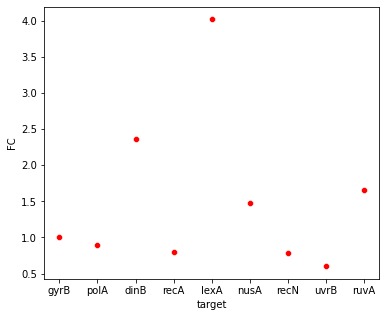

In [52]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=fc_data[fc_data.FC<20], x="target", y="FC", color='red')

# Statistics

In [71]:
data = pd.read_csv('qPCR_01_09_2022.csv')[['rep', 'Sample Name', 'Target Name', 'Cт']].sort_values('Target Name')
data = data[data['Cт']<=30]
house_k = 'Target 1'
treat = 'met'
control = 'dmso'
data

,rep,Sample Name,Target Name,Cт
0,1,met_4x,Target 1,23.492756
69,4,dmso_4x,Target 1,17.669193
59,3,dmso_4x,Target 1,17.723028
49,2,dmso_4x,Target 1,17.977381
29,4,met_4x,Target 1,23.115936
...,...,...,...,...
37,4,met_4x,Target 9,24.936670
27,3,met_4x,Target 9,24.697996
17,2,met_4x,Target 9,25.646004
57,2,dmso_4x,Target 9,20.370993


In [73]:
data.dtypes

rep              int64
Sample Name     object
Target Name     object
Cт             float64
dtype: object

In [13]:
import numpy as np

In [80]:
delta_list = []
for _, row in data.iterrows():
    try:
        delta_list.append(row['Cт'] - float(data[(data['Target Name'] == 'Target 1') & (data['Sample Name'] == row['Sample Name']) & (data['rep'] == row['rep'])]['Cт']))
    except:
        delta_list.append(np.NaN)
data['delta'] = delta_list

In [81]:
data

,rep,Sample Name,Target Name,Cт,delta
0,1,met_4x,Target 1,23.492756,0.000000
69,4,dmso_4x,Target 1,17.669193,0.000000
59,3,dmso_4x,Target 1,17.723028,0.000000
49,2,dmso_4x,Target 1,17.977381,0.000000
29,4,met_4x,Target 1,23.115936,0.000000
...,...,...,...,...,...
37,4,met_4x,Target 9,24.936670,1.820734
27,3,met_4x,Target 9,24.697996,1.784954
17,2,met_4x,Target 9,25.646004,1.778112
57,2,dmso_4x,Target 9,20.370993,2.393612


In [82]:
data = data.dropna(how='any')
data

,rep,Sample Name,Target Name,Cт,delta
0,1,met_4x,Target 1,23.492756,0.000000
69,4,dmso_4x,Target 1,17.669193,0.000000
59,3,dmso_4x,Target 1,17.723028,0.000000
49,2,dmso_4x,Target 1,17.977381,0.000000
29,4,met_4x,Target 1,23.115936,0.000000
...,...,...,...,...,...
37,4,met_4x,Target 9,24.936670,1.820734
27,3,met_4x,Target 9,24.697996,1.784954
17,2,met_4x,Target 9,25.646004,1.778112
57,2,dmso_4x,Target 9,20.370993,2.393612


In [84]:
fc_data = pd.DataFrame(columns=['sample', 'target', 'delta2'])
for _, row in data.iterrows():
    if treat in row['Sample Name']:
        try:
            fc_data = fc_data.append({'sample': row['Sample Name'],
                                      'target': row['Target Name'],
                                      'delta2': (row['delta'] - float(data[(data['Target Name'] ==row['Target Name']) & (data['Sample Name'] == control+'_'+row['Sample Name'].split('_')[1]) & (data['rep'] == row['rep'])]['delta']))

            }, ignore_index = True)
        except:
            print(row['Sample Name'])
fc_data

/tmp/ipykernel_25009/2150055671.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_25009/2150055671.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_25009/2150055671.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_25009/2150055671.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_25009/2150055671.py:5: FutureWarning: The frame.append method is depr

/tmp/ipykernel_25009/2150055671.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],


,sample,target,delta2
0,met_4x,Target 1,0.0
1,met_4x,Target 1,0.0
2,met_4x,Target 1,0.0
3,met_4x,Target 1,0.0
4,met_4x,Target 10,0.441412
5,met_4x,Target 10,0.154037
6,met_4x,Target 10,0.09742
7,met_4x,Target 10,-0.09412
8,met_4x,Target 2,-1.100906
9,met_4x,Target 2,-1.268747


In [85]:
fc_data['FC'] = 2**(-fc_data['delta2'])
fc_data

,sample,target,delta2,FC
0,met_4x,Target 1,0.0,1.0
1,met_4x,Target 1,0.0,1.0
2,met_4x,Target 1,0.0,1.0
3,met_4x,Target 1,0.0,1.0
4,met_4x,Target 10,0.441412,0.736414
5,met_4x,Target 10,0.154037,0.898732
6,met_4x,Target 10,0.09742,0.934703
7,met_4x,Target 10,-0.09412,1.067414
8,met_4x,Target 2,-1.100906,2.144894
9,met_4x,Target 2,-1.268747,2.409523


In [87]:
fc_data = fc_data.replace({"target": my_dict})
fc_data                         

,sample,target,delta2,FC
0,met_4x,gyrB,0.0,1.0
1,met_4x,gyrB,0.0,1.0
2,met_4x,gyrB,0.0,1.0
3,met_4x,gyrB,0.0,1.0
4,met_4x,polA,0.441412,0.736414
5,met_4x,polA,0.154037,0.898732
6,met_4x,polA,0.09742,0.934703
7,met_4x,polA,-0.09412,1.067414
8,met_4x,dinB,-1.100906,2.144894
9,met_4x,dinB,-1.268747,2.409523


<AxesSubplot:xlabel='target', ylabel='FC'>

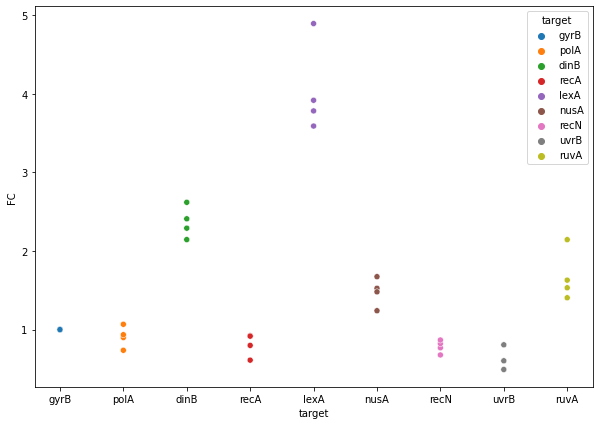

In [94]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=fc_data[fc_data.FC<20], x="target", y="FC", color='red', hue='target')

In [23]:
from scipy.stats import ttest_ind

In [101]:
house = fc_data[fc_data['target']=='gyrB']
t_dict = {}
for target in set(fc_data.target.to_list()):
    ask = fc_data[fc_data['target']==target]
    res = ttest_ind(house['FC'], ask['FC'])
    t_dict.update({target:res})

In [102]:
t_dict

{'nusA': Ttest_indResult(statistic=-5.3347997778499865, pvalue=0.0017700278166006464),
 'recN': Ttest_indResult(statistic=5.289346201640491, pvalue=0.0018485831567026899),
 'gyrB': Ttest_indResult(statistic=nan, pvalue=nan),
 'polA': Ttest_indResult(statistic=1.3316886774103334, pvalue=0.2313175264596537),
 'uvrB': Ttest_indResult(statistic=4.757219496515541, pvalue=0.005071922350214529),
 'recA': Ttest_indResult(statistic=2.5882573997594274, pvalue=0.04130850162740636),
 'lexA': Ttest_indResult(statistic=-10.485510573030632, pvalue=4.417234409921645e-05),
 'ruvA': Ttest_indResult(statistic=-4.178089468383207, pvalue=0.005825857498928165),
 'dinB': Ttest_indResult(statistic=-13.62465434594125, pvalue=9.706693877789471e-06),
 'dnaK': Ttest_indResult(statistic=-6.7320256704576495, pvalue=0.0005229566702192213)}

# 28.09 HK validation

In [48]:
data = pd.read_csv("28_09_22.csv")[['rep', 'Sample Name', 'Target Name', 'Cт']].sort_values('Target Name')
data = data[data['Cт']<=30]
data

,rep,Sample Name,Target Name,Cт
26,4,Bt_Met,Bt_1813,27.868282
20,2,Bt_DMSO,Bt_1813,22.838125
21,3,Bt_DMSO,Bt_1813,22.194296
22,4,Bt_DMSO,Bt_1813,22.398808
23,5,Bt_DMSO,Bt_1813,22.840014
24,2,Bt_Met,Bt_1813,27.751303
25,3,Bt_Met,Bt_1813,27.983450
27,5,Bt_Met,Bt_1813,28.116344
35,5,Bt_Met,Bt_899,22.293829
28,2,Bt_DMSO,Bt_899,17.234470


In [49]:
data.dtypes

rep              int64
Sample Name     object
Target Name     object
Cт             float64
dtype: object

In [50]:
treat = 'Met'
control = 'DMSO'

In [51]:
data

,rep,Sample Name,Target Name,Cт
26,4,Bt_Met,Bt_1813,27.868282
20,2,Bt_DMSO,Bt_1813,22.838125
21,3,Bt_DMSO,Bt_1813,22.194296
22,4,Bt_DMSO,Bt_1813,22.398808
23,5,Bt_DMSO,Bt_1813,22.840014
24,2,Bt_Met,Bt_1813,27.751303
25,3,Bt_Met,Bt_1813,27.983450
27,5,Bt_Met,Bt_1813,28.116344
35,5,Bt_Met,Bt_899,22.293829
28,2,Bt_DMSO,Bt_899,17.234470


In [52]:
fc_data = pd.DataFrame(columns=['sample', 'target', 'rep','delta2'])
for _, row in data.iterrows():
    if treat in row['Sample Name']:
        try:
            fc_data = fc_data.append({'sample': row['Sample Name'],
                                      'target': row['Target Name'],
                                      'rep': row['rep'],
                                      'delta2': (row['Cт'] - float(data[(data['Target Name'] ==row['Target Name']) & (data['Sample Name'] == row['Sample Name'].split('_')[0]+'_'+control) & (data['rep'] == row['rep'])]['Cт']))

            }, ignore_index = True)
        except:
            print(row['Sample Name'])
fc_data

/tmp/ipykernel_31992/3452373353.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_31992/3452373353.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_31992/3452373353.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_31992/3452373353.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_31992/3452373353.py:5: FutureWarning: The frame.append method is depr

,sample,target,rep,delta2
0,Bt_Met,Bt_1813,4,5.469475
1,Bt_Met,Bt_1813,2,4.913177
2,Bt_Met,Bt_1813,3,5.789154
3,Bt_Met,Bt_1813,5,5.276331
4,Bt_Met,Bt_899,5,5.081196
5,Bt_Met,Bt_899,2,5.633024
6,Bt_Met,Bt_899,3,3.752419
7,Bt_Met,Bt_899,4,6.684946
8,BuCL_Met,Bu_gyrB,5,6.970737
9,BuCL_Met,Bu_gyrB,4,5.314535


In [53]:
fc_data['FC'] = 2**(-fc_data['delta2'])
fc_data

,sample,target,rep,delta2,FC
0,Bt_Met,Bt_1813,4,5.469475,0.02257
1,Bt_Met,Bt_1813,2,4.913177,0.033188
2,Bt_Met,Bt_1813,3,5.789154,0.018084
3,Bt_Met,Bt_1813,5,5.276331,0.025803
4,Bt_Met,Bt_899,5,5.081196,0.02954
5,Bt_Met,Bt_899,2,5.633024,0.020151
6,Bt_Met,Bt_899,3,3.752419,0.074201
7,Bt_Met,Bt_899,4,6.684946,0.009719
8,BuCL_Met,Bu_gyrB,5,6.970737,0.007973
9,BuCL_Met,Bu_gyrB,4,5.314535,0.025128


<AxesSubplot:xlabel='target', ylabel='FC'>

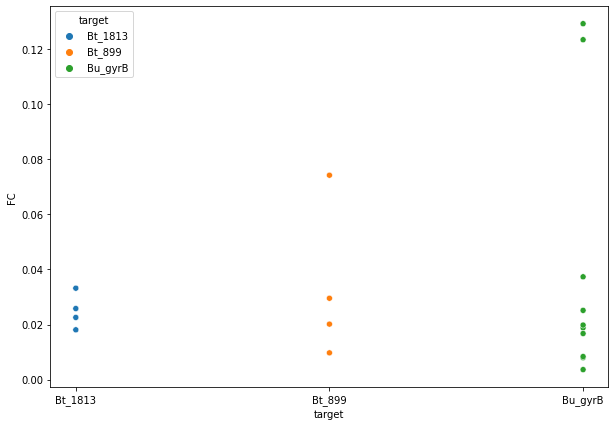

In [54]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=fc_data[fc_data.FC<20], x="target", y="FC", color='red', hue='target')

In [55]:
fc_data

,sample,target,rep,delta2,FC
0,Bt_Met,Bt_1813,4,5.469475,0.02257
1,Bt_Met,Bt_1813,2,4.913177,0.033188
2,Bt_Met,Bt_1813,3,5.789154,0.018084
3,Bt_Met,Bt_1813,5,5.276331,0.025803
4,Bt_Met,Bt_899,5,5.081196,0.02954
5,Bt_Met,Bt_899,2,5.633024,0.020151
6,Bt_Met,Bt_899,3,3.752419,0.074201
7,Bt_Met,Bt_899,4,6.684946,0.009719
8,BuCL_Met,Bu_gyrB,5,6.970737,0.007973
9,BuCL_Met,Bu_gyrB,4,5.314535,0.025128


In [56]:
#house = fc_data[fc_data['target']=='gyrB']
house=[1.0,1.0,1.0,1.0,]
t_dict = {}
for target in set(fc_data.target.to_list()):
    ask = fc_data[fc_data['target']==target]
    res = ttest_ind(house, ask['FC'])
    t_dict.update({target:res})

In [57]:
t_dict

{'Bt_899': Ttest_indResult(statistic=68.12287487590388, pvalue=6.730897221952774e-10),
 'Bu_gyrB': Ttest_indResult(statistic=39.913116628427986, pvalue=3.952329130295927e-14),
 'Bt_1813': Ttest_indResult(statistic=306.56391445777734, pvalue=8.130266774776473e-14)}

## HK validation 20.10.2022

In [4]:
data = pd.read_csv("20_10_2022_data.csv")[['biol_rep','t_rep', 'Sample Name', 'Target Name', 'Cт']].sort_values('Target Name')
data = data[data['Cт']<=30]
data

,biol_rep,t_rep,Sample Name,Target Name,Cт
72,1,1,Bt_DMSO,Bt_1813,22.268440
73,2,1,Bt_DMSO,Bt_1813,22.274094
74,3,1,Bt_DMSO,Bt_1813,21.944807
75,1,1,Bt_Met,Bt_1813,25.338818
76,2,1,Bt_Met,Bt_1813,24.473658
...,...,...,...,...,...
19,2,2,Bu_DMSO,Bu_rho,20.035013
20,3,2,Bu_DMSO,Bu_rho,19.628025
21,1,2,Bu_Met,Bu_rho,23.512506
23,3,2,Bu_Met,Bu_rho,22.576397


In [5]:
treat = 'Met'
control = 'DMSO'

In [7]:
data = data.groupby(['biol_rep', 'Sample Name', 'Target Name']).mean()
data

t_rep         Cт
biol_rep Sample Name Target Name                  
1        Bt_DMSO     Bt_1813        1.5  21.998639
                     Bt_dinB        1.5  21.140130
                     Bt_gap         1.5  14.936758
                     Bt_rho         1.5  18.695908
         Bt_Met      Bt_1813        1.5  25.348720
                     Bt_dinB        1.5  24.497790
                     Bt_gap         1.5  19.559019
                     Bt_rho         1.5  22.477313
         Bu_DMSO     Bu_dinB        1.5  21.741939
                     Bu_gap         1.5  15.254762
                     Bu_gyrB        1.5  19.260933
                     Bu_rho         1.5  19.096303
         Bu_Met      Bu_dinB        1.5  26.467443
                     Bu_gap         1.5  20.836607
                     Bu_gyrB        1.5  23.241764
                     Bu_rho         1.5  23.491239
2        Bt_DMSO     Bt_1813        1.5  22.371531
                     Bt_dinB        1.5  22.065792
                     Bt_gap         1.5  15.394703
                     Bt_rho         1.5  19.169712
         Bt_Met      Bt_1813        1.5  24.634304
                     Bt_dinB        1.5  23.901964
                     Bt_gap         1.5  18.304198
                     Bt_rho         1.5  21.636793
         Bu_DMSO     Bu_dinB        1.5  22.687781
                     Bu_gap         1.5  15.952196
                     Bu_gyrB        1.5  19.741072
                     Bu_rho         1.5  20.016598
         Bu_Met      Bu_dinB        1.5  26.833997
                     Bu_gap         1.5  21.037429
                     Bu_gyrB        1.5  23.368327
                     Bu_rho         1.5  23.543488
3        Bt_DMSO     Bt_1813        1.5  22.045472
                     Bt_dinB        1.5  21.710876
                     Bt_gap         1.5  15.155010
                     Bt_rho         1.5  19.004416
         Bt_Met      Bt_1813        1.5  25.418798
                     Bt_dinB        1.5  24.353884
                     Bt_gap         1.5  19.263493
                     Bt_rho         1.5  22.314309
         Bu_DMSO     Bu_dinB        1.5  22.061660
                     Bu_gap         1.5  15.953174
                     Bu_gyrB        1.5  19.405553
                     Bu_rho         1.5  19.590040
         Bu_Met      Bu_dinB        1.5  25.984459
                     Bu_gap         1.5  20.708917
                     Bu_gyrB        1.5  22.781322
                     Bu_rho         1.5  22.571783

In [8]:
data = data.reset_index()

In [9]:
data

,biol_rep,Sample Name,Target Name,t_rep,Cт
0,1,Bt_DMSO,Bt_1813,1.5,21.998639
1,1,Bt_DMSO,Bt_dinB,1.5,21.140130
2,1,Bt_DMSO,Bt_gap,1.5,14.936758
3,1,Bt_DMSO,Bt_rho,1.5,18.695908
4,1,Bt_Met,Bt_1813,1.5,25.348720
5,1,Bt_Met,Bt_dinB,1.5,24.497790
6,1,Bt_Met,Bt_gap,1.5,19.559019
7,1,Bt_Met,Bt_rho,1.5,22.477313
8,1,Bu_DMSO,Bu_dinB,1.5,21.741939
9,1,Bu_DMSO,Bu_gap,1.5,15.254762


In [10]:
data = data.drop('t_rep', axis=1)
data = data.rename(columns={'biol_rep':'rep'})
data

,rep,Sample Name,Target Name,Cт
0,1,Bt_DMSO,Bt_1813,21.998639
1,1,Bt_DMSO,Bt_dinB,21.140130
2,1,Bt_DMSO,Bt_gap,14.936758
3,1,Bt_DMSO,Bt_rho,18.695908
4,1,Bt_Met,Bt_1813,25.348720
5,1,Bt_Met,Bt_dinB,24.497790
6,1,Bt_Met,Bt_gap,19.559019
7,1,Bt_Met,Bt_rho,22.477313
8,1,Bu_DMSO,Bu_dinB,21.741939
9,1,Bu_DMSO,Bu_gap,15.254762


In [11]:
fc_data = pd.DataFrame(columns=['sample', 'target', 'rep','delta2'])
for _, row in data.iterrows():
    if treat in row['Sample Name']:
        try:
            fc_data = fc_data.append({'sample': row['Sample Name'],
                                      'target': row['Target Name'],
                                      'rep': row['rep'],
                                      'delta2': (row['Cт'] - float(data[(data['Target Name'] ==row['Target Name']) & (data['Sample Name'] == row['Sample Name'].split('_')[0]+'_'+control) & (data['rep'] == row['rep'])]['Cт']))

            }, ignore_index = True)
        except:
            print(row['Sample Name'])
fc_data

/tmp/ipykernel_13057/3452373353.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_13057/3452373353.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_13057/3452373353.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_13057/3452373353.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_13057/3452373353.py:5: FutureWarning: The frame.append method is depr

,sample,target,rep,delta2
0,Bt_Met,Bt_1813,1,3.35008
1,Bt_Met,Bt_dinB,1,3.35766
2,Bt_Met,Bt_gap,1,4.622261
3,Bt_Met,Bt_rho,1,3.781405
4,Bu_Met,Bu_dinB,1,4.725505
5,Bu_Met,Bu_gap,1,5.581845
6,Bu_Met,Bu_gyrB,1,3.980831
7,Bu_Met,Bu_rho,1,4.394936
8,Bt_Met,Bt_1813,2,2.262774
9,Bt_Met,Bt_dinB,2,1.836172


In [12]:
fc_data

,sample,target,rep,delta2
0,Bt_Met,Bt_1813,1,3.35008
1,Bt_Met,Bt_dinB,1,3.35766
2,Bt_Met,Bt_gap,1,4.622261
3,Bt_Met,Bt_rho,1,3.781405
4,Bu_Met,Bu_dinB,1,4.725505
5,Bu_Met,Bu_gap,1,5.581845
6,Bu_Met,Bu_gyrB,1,3.980831
7,Bu_Met,Bu_rho,1,4.394936
8,Bt_Met,Bt_1813,2,2.262774
9,Bt_Met,Bt_dinB,2,1.836172


In [13]:
fc_data['FC'] = 2**(-fc_data['delta2'])
fc_data

,sample,target,rep,delta2,FC
0,Bt_Met,Bt_1813,1,3.35008,0.098068
1,Bt_Met,Bt_dinB,1,3.35766,0.097554
2,Bt_Met,Bt_gap,1,4.622261,0.040603
3,Bt_Met,Bt_rho,1,3.781405,0.072725
4,Bu_Met,Bu_dinB,1,4.725505,0.037799
5,Bu_Met,Bu_gap,1,5.581845,0.020878
6,Bu_Met,Bu_gyrB,1,3.980831,0.063336
7,Bu_Met,Bu_rho,1,4.394936,0.047533
8,Bt_Met,Bt_1813,2,2.262774,0.208371
9,Bt_Met,Bt_dinB,2,1.836172,0.280064


In [18]:
fc_data = fc_data.sort_values('target')
fc_data = fc_data[(fc_data.target != 'Bt_dinB') & (fc_data.target != 'Bu_dinB')]
fc_data

,sample,target,rep,delta2,FC
0,Bt_Met,Bt_1813,1,3.35008,0.098068
16,Bt_Met,Bt_1813,3,3.373326,0.0965
8,Bt_Met,Bt_1813,2,2.262774,0.208371
2,Bt_Met,Bt_gap,1,4.622261,0.040603
18,Bt_Met,Bt_gap,3,4.108483,0.057973
10,Bt_Met,Bt_gap,2,2.909495,0.133093
19,Bt_Met,Bt_rho,3,3.309893,0.100838
11,Bt_Met,Bt_rho,2,2.467081,0.180857
3,Bt_Met,Bt_rho,1,3.781405,0.072725
13,Bu_Met,Bu_gap,2,5.085233,0.029457


<AxesSubplot:xlabel='target', ylabel='FC'>

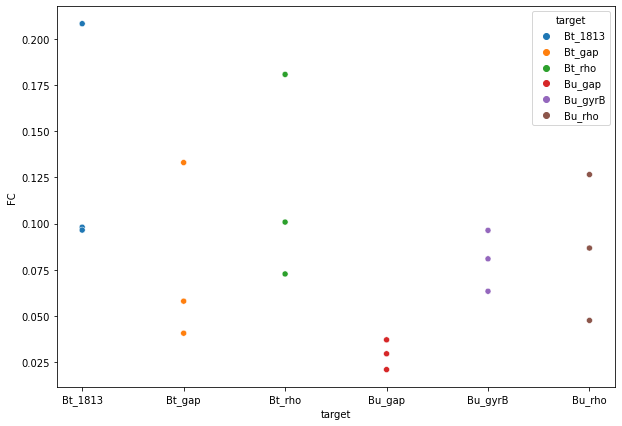

In [19]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=fc_data[fc_data.FC<20], x="target", y="FC", color='red', hue='target')

#  11.11.2022

In [3]:
data = pd.read_csv('LM008Db_11_11_22_data.csv')[['rep', 'Sample Name', 'Target Name', 'Cт']].sort_values('Target Name')
data = data[data['Cт']<=30]
data

,rep,Sample Name,Target Name,Cт
47,3,MMC,dinB,20.072275
46,2,MMC,dinB,18.724567
45,1,MMC,dinB,16.927683
44,3,Met_60,dinB,17.684784
43,2,Met_60,dinB,20.080990
...,...,...,...,...
16,2,Met_20,rho,16.289949
15,1,Met_20,rho,16.794674
14,3,DMSO,rho,15.821593
12,1,DMSO,rho,16.180374


In [7]:
data[data['Target Name'] == 'rho']

,rep,Sample Name,Target Name,Cт
23,3,MMC,rho,15.978377
22,2,MMC,rho,16.236490
21,1,MMC,rho,15.268125
20,3,Met_60,rho,15.840569
19,2,Met_60,rho,16.622501
18,1,Met_60,rho,16.006973
17,3,Met_20,rho,16.164572
16,2,Met_20,rho,16.289949
15,1,Met_20,rho,16.794674
14,3,DMSO,rho,15.821593


In [8]:
data = data[data['Target Name'] != 'gap']
data = data[data['Target Name'] != 'gyrB']
data

,rep,Sample Name,Target Name,Cт
47,3,MMC,dinB,20.072275
46,2,MMC,dinB,18.724567
45,1,MMC,dinB,16.927683
44,3,Met_60,dinB,17.684784
43,2,Met_60,dinB,20.080990
...,...,...,...,...
16,2,Met_20,rho,16.289949
15,1,Met_20,rho,16.794674
14,3,DMSO,rho,15.821593
12,1,DMSO,rho,16.180374


In [17]:
data1 = data[data['Sample Name'] != 'Met_20']
data1 = data1[data1['Sample Name'] != 'Met_60']

In [18]:
house_k = 'rho'
treat = 'MMC'
control = 'DMSO'
data1

,rep,Sample Name,Target Name,Cт
47,3,MMC,dinB,20.072275
46,2,MMC,dinB,18.724567
45,1,MMC,dinB,16.927683
38,3,DMSO,dinB,18.887424
37,2,DMSO,dinB,17.149220
36,1,DMSO,dinB,18.663353
57,1,MMC,lexA,16.793226
48,1,DMSO,lexA,18.521299
49,2,DMSO,lexA,17.048246
50,3,DMSO,lexA,18.608942


In [21]:
delta_list = []
for _, row in data1.iterrows():
    try:
        delta_list.append(row['Cт'] - float(data1[(data1['Target Name'] == 'rho') & (data1['Sample Name'] == row['Sample Name']) & (data1['rep'] == row['rep'])]['Cт']))
    except:
        delta_list.append(np.NaN)
data1['delta'] = delta_list

In [22]:
data1

,rep,Sample Name,Target Name,Cт,delta
47,3,MMC,dinB,20.072275,4.093898
46,2,MMC,dinB,18.724567,2.488077
45,1,MMC,dinB,16.927683,1.659558
38,3,DMSO,dinB,18.887424,3.065831
37,2,DMSO,dinB,17.149220,1.634022
36,1,DMSO,dinB,18.663353,2.482979
57,1,MMC,lexA,16.793226,1.525102
48,1,DMSO,lexA,18.521299,2.340925
49,2,DMSO,lexA,17.048246,1.533049
50,3,DMSO,lexA,18.608942,2.787349


In [24]:
data1 = data1.dropna(how='any')
fc_data = pd.DataFrame(columns=['sample', 'target', 'delta2'])
for _, row in data1.iterrows():
    if treat in row['Sample Name']:
        try:
            fc_data = fc_data.append({'sample': row['Sample Name'],
                                      'target': row['Target Name'],
                                      'delta2': (row['delta'] - float(data1[(data1['Target Name'] ==row['Target Name']) & (data1['Sample Name'] == control) & (data1['rep'] == row['rep'])]['delta']))

            }, ignore_index = True)
        except:
            print(row['Sample Name'])
fc_data['FC'] = 2**(-fc_data['delta2'])
fc_data

/tmp/ipykernel_21211/2219663533.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_21211/2219663533.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_21211/2219663533.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_21211/2219663533.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_21211/2219663533.py:6: FutureWarning: The frame.append method is depr

,sample,target,delta2,FC
0,MMC,dinB,1.028067,0.490367
1,MMC,dinB,0.854055,0.553227
2,MMC,dinB,-0.823421,1.769597
3,MMC,lexA,-0.815824,1.760303
4,MMC,lexA,0.582024,0.668026
5,MMC,lexA,-0.152037,1.111137
6,MMC,nusA,0.528376,0.693335
7,MMC,nusA,-0.240073,1.181053
8,MMC,nusA,-0.008645,1.00601
9,MMC,recA,0.386414,0.765029


In [25]:
data1 = data[data['Sample Name'] != 'MMC']
data1 = data1[data1['Sample Name'] != 'Met_60']

In [28]:
house_k = 'rho'
treat = 'Met_20'
control = 'DMSO'
data1

,rep,Sample Name,Target Name,Cт,delta
41,3,Met_20,dinB,18.935574,NaN
40,2,Met_20,dinB,18.221632,NaN
39,1,Met_20,dinB,21.080900,NaN
38,3,DMSO,dinB,18.887424,NaN
37,2,DMSO,dinB,17.149220,NaN
36,1,DMSO,dinB,18.663353,NaN
48,1,DMSO,lexA,18.521299,NaN
49,2,DMSO,lexA,17.048246,NaN
50,3,DMSO,lexA,18.608942,NaN
51,1,Met_20,lexA,20.652742,NaN


In [29]:
delta_list = []
for _, row in data1.iterrows():
    try:
        delta_list.append(row['Cт'] - float(data1[(data1['Target Name'] == 'rho') & (data1['Sample Name'] == row['Sample Name']) & (data1['rep'] == row['rep'])]['Cт']))
    except:
        delta_list.append(np.NaN)
data1['delta'] = delta_list

In [30]:
data1 = data1.dropna(how='any')
fc_data = pd.DataFrame(columns=['sample', 'target', 'delta2'])
for _, row in data1.iterrows():
    if treat in row['Sample Name']:
        try:
            fc_data = fc_data.append({'sample': row['Sample Name'],
                                      'target': row['Target Name'],
                                      'delta2': (row['delta'] - float(data1[(data1['Target Name'] ==row['Target Name']) & (data1['Sample Name'] == control) & (data1['rep'] == row['rep'])]['delta']))

            }, ignore_index = True)
        except:
            print(row['Sample Name'])
fc_data['FC'] = 2**(-fc_data['delta2'])
fc_data

/tmp/ipykernel_21211/2219663533.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_21211/2219663533.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_21211/2219663533.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_21211/2219663533.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_21211/2219663533.py:6: FutureWarning: The frame.append method is depr

,sample,target,delta2,FC
0,Met_20,dinB,-0.294829,1.22674
1,Met_20,dinB,0.297661,0.81357
2,Met_20,dinB,1.803247,0.286529
3,Met_20,lexA,1.517143,0.349377
4,Met_20,lexA,-0.310095,1.239789
5,Met_20,lexA,-1.227035,2.340853
6,Met_20,nusA,-0.031187,1.021853
7,Met_20,nusA,-0.085962,1.061395
8,Met_20,nusA,0.025805,0.982272
9,Met_20,recA,0.054909,0.962655


In [31]:
data1 = data[data['Sample Name'] != 'MMC']
data1 = data1[data1['Sample Name'] != 'Met_20']
house_k = 'rho'
treat = 'Met_60'
control = 'DMSO'
delta_list = []
for _, row in data1.iterrows():
    try:
        delta_list.append(row['Cт'] - float(data1[(data1['Target Name'] == 'rho') & (data1['Sample Name'] == row['Sample Name']) & (data1['rep'] == row['rep'])]['Cт']))
    except:
        delta_list.append(np.NaN)
data1['delta'] = delta_list
data1 = data1.dropna(how='any')
fc_data = pd.DataFrame(columns=['sample', 'target', 'delta2'])
for _, row in data1.iterrows():
    if treat in row['Sample Name']:
        try:
            fc_data = fc_data.append({'sample': row['Sample Name'],
                                      'target': row['Target Name'],
                                      'delta2': (row['delta'] - float(data1[(data1['Target Name'] ==row['Target Name']) & (data1['Sample Name'] == control) & (data1['rep'] == row['rep'])]['delta']))

            }, ignore_index = True)
        except:
            print(row['Sample Name'])
fc_data['FC'] = 2**(-fc_data['delta2'])
fc_data

/tmp/ipykernel_21211/316938120.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_21211/316938120.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_21211/316938120.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_21211/316938120.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_21211/316938120.py:18: FutureWarning: The frame.append method is depr

,sample,target,delta2,FC
0,Met_60,dinB,-1.221617,2.332079
1,Met_60,dinB,1.824467,0.282345
2,Met_60,dinB,-0.205351,1.152967
3,Met_60,lexA,-0.425398,1.342943
4,Met_60,lexA,-1.349514,2.548263
5,Met_60,lexA,1.380524,0.384079
6,Met_60,nusA,-0.051397,1.036268
7,Met_60,nusA,-0.101744,1.07307
8,Met_60,nusA,0.167712,0.890253
9,Met_60,recA,-0.362514,1.285665


# 16.11.2022

In [59]:
data = pd.read_csv('LM008Db_16_11_22.csv')[['Sample Name', 'Target Name', 'Cт']].sort_values('Target Name')
data = data[data['Cт']<=30]
data

,Sample Name,Target Name,Cт
77,Sample 6,dinb_1,18.696417
72,Sample 1,dinb_1,18.711510
73,Sample 2,dinb_1,17.488968
74,Sample 3,dinb_1,19.067963
75,Sample 4,dinb_1,20.904320
...,...,...,...
25,Sample 2,rho_3,15.337780
24,Sample 1,rho_3,15.815125
35,Sample 12,rho_3,16.113314
28,Sample 5,rho_3,15.952847


In [60]:
data[['Target Name', 'rep']] = data['Target Name'].str.split('_', 1, expand=True)
data

,Sample Name,Target Name,Cт,rep
77,Sample 6,dinb,18.696417,1
72,Sample 1,dinb,18.711510,1
73,Sample 2,dinb,17.488968,1
74,Sample 3,dinb,19.067963,1
75,Sample 4,dinb,20.904320,1
...,...,...,...,...
25,Sample 2,rho,15.337780,3
24,Sample 1,rho,15.815125,3
35,Sample 12,rho,16.113314,3
28,Sample 5,rho,15.952847,3


In [ ]:
# quick technical replicates check

In [61]:
my_dict = {'Sample 1':'DMSO-1', 'Sample 2':'DMSO-2', 'Sample 3':'DMSO-3', 'Sample 4':'Met_20-1', 'Sample 5':'Met_20-2', 'Sample 6':'Met_20-3', 'Sample 7':'Met_60-1','Sample 8': 'Met_60-2', 'Sample 9':'Met_60-3', 'Sample 10':'MMC-1', 'Sample 11':'MMC-2', 'Sample 12':'MMC-3'}
data = data.replace({"Sample Name": my_dict})
data

,Sample Name,Target Name,Cт,rep
77,Met_20-3,dinb,18.696417,1
72,DMSO-1,dinb,18.711510,1
73,DMSO-2,dinb,17.488968,1
74,DMSO-3,dinb,19.067963,1
75,Met_20-1,dinb,20.904320,1
...,...,...,...,...
25,DMSO-2,rho,15.337780,3
24,DMSO-1,rho,15.815125,3
35,MMC-3,rho,16.113314,3
28,Met_20-2,rho,15.952847,3


In [64]:
data.sort_values(by=['Sample Name','Target Name']).to_csv('replicates_check.txt', sep='\t', index=False)

In [ ]:
# end

In [49]:
num_list = data[data['Target Name']=='rho']['Cт'].to_list()
num_list.sort()
print(num_list[0],num_list[-1])

15.0561599731445 16.7758808135986


In [50]:
data = data.groupby(['Sample Name','Target Name']).mean().reset_index()
data

,Sample Name,Target Name,Cт
0,Sample 1,dinb,18.747770
1,Sample 1,lexa,18.416456
2,Sample 1,rho,15.894681
3,Sample 10,dinb,19.458769
4,Sample 10,lexa,16.645456
5,Sample 10,rho,15.097482
6,Sample 11,dinb,18.928236
7,Sample 11,lexa,18.218140
8,Sample 11,rho,16.022998
9,Sample 12,dinb,20.657229


In [51]:
my_dict = {'Sample 1':'DMSO-1', 'Sample 2':'DMSO-2', 'Sample 3':'DMSO-3', 'Sample 4':'Met_20-1', 'Sample 5':'Met_20-2', 'Sample 6':'Met_20-3', 'Sample 7':'Met_60-1','Sample 8': 'Met_60-2', 'Sample 9':'Met_60-3', 'Sample 10':'MMC-1', 'Sample 11':'MMC-2', 'Sample 12':'MMC-3'}
data = data.replace({"Sample Name": my_dict})

In [52]:
data

,Sample Name,Target Name,Cт
0,DMSO-1,dinb,18.747770
1,DMSO-1,lexa,18.416456
2,DMSO-1,rho,15.894681
3,MMC-1,dinb,19.458769
4,MMC-1,lexa,16.645456
5,MMC-1,rho,15.097482
6,MMC-2,dinb,18.928236
7,MMC-2,lexa,18.218140
8,MMC-2,rho,16.022998
9,MMC-3,dinb,20.657229


In [53]:
data[['Sample Name', 'rep']] = data['Sample Name'].str.split('-', 1, expand=True)
data

,Sample Name,Target Name,Cт,rep
0,DMSO,dinb,18.747770,1
1,DMSO,lexa,18.416456,1
2,DMSO,rho,15.894681,1
3,MMC,dinb,19.458769,1
4,MMC,lexa,16.645456,1
5,MMC,rho,15.097482,1
6,MMC,dinb,18.928236,2
7,MMC,lexa,18.218140,2
8,MMC,rho,16.022998,2
9,MMC,dinb,20.657229,3


In [54]:
data1 = data[data['Sample Name'] != 'MMC']
data1 = data1[data1['Sample Name'] != 'Met_60']
house_k = 'rho'
treat = 'Met_20'
control = 'DMSO'
delta_list = []
for _, row in data1.iterrows():
    try:
        delta_list.append(row['Cт'] - float(data1[(data1['Target Name'] == house_k) & (data1['Sample Name'] == row['Sample Name']) & (data1['rep'] == row['rep'])]['Cт']))
    except:
        delta_list.append(np.NaN)
data1['delta'] = delta_list
data1 = data1.dropna(how='any')
data1

,Sample Name,Target Name,Cт,rep,delta
0,DMSO,dinb,18.747770,1,2.853089
1,DMSO,lexa,18.416456,1,2.521775
2,DMSO,rho,15.894681,1,0.000000
12,DMSO,dinb,17.517929,2,2.164837
13,DMSO,lexa,17.055867,2,1.702775
14,DMSO,rho,15.353092,2,0.000000
15,DMSO,dinb,19.015121,3,3.406062
16,DMSO,lexa,18.736149,3,3.127090
17,DMSO,rho,15.609059,3,0.000000
18,Met_20,dinb,20.893601,1,4.233685


In [55]:
fc_data = pd.DataFrame(columns=['sample', 'target', 'delta2'])
for _, row in data1.iterrows():
    if treat in row['Sample Name']:
        try:
            fc_data = fc_data.append({'sample': row['Sample Name'],
                                      'target': row['Target Name'],
                                      'delta2': (row['delta'] - float(data1[(data1['Target Name'] ==row['Target Name']) & (data1['Sample Name'] == control) & (data1['rep'] == row['rep'])]['delta']))

            }, ignore_index = True)
        except:
            print(row['Sample Name'])
fc_data['FC'] = 2**(-fc_data['delta2'])
fc_data

/tmp/ipykernel_7247/490148862.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_7247/490148862.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_7247/490148862.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_7247/490148862.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_7247/490148862.py:5: FutureWarning: The frame.append method is deprecated and

,sample,target,delta2,FC
0,Met_20,dinb,1.380596,0.38406
1,Met_20,lexa,1.407026,0.377088
2,Met_20,rho,0.0,1.0
3,Met_20,dinb,0.34304,0.788378
4,Met_20,lexa,-0.201057,1.149541
5,Met_20,rho,0.0,1.0
6,Met_20,dinb,-0.714548,1.640969
7,Met_20,lexa,-1.534594,2.897069
8,Met_20,rho,0.0,1.0


In [56]:
fc_data.sort_values(by='target')

,sample,target,delta2,FC
0,Met_20,dinb,1.380596,0.38406
3,Met_20,dinb,0.34304,0.788378
6,Met_20,dinb,-0.714548,1.640969
1,Met_20,lexa,1.407026,0.377088
4,Met_20,lexa,-0.201057,1.149541
7,Met_20,lexa,-1.534594,2.897069
2,Met_20,rho,0.0,1.0
5,Met_20,rho,0.0,1.0
8,Met_20,rho,0.0,1.0


In [57]:
data1 = data[data['Sample Name'] != 'MMC']
data1 = data1[data1['Sample Name'] != 'Met_20']
house_k = 'rho'
treat = 'Met_60'
control = 'DMSO'
delta_list = []
for _, row in data1.iterrows():
    try:
        delta_list.append(row['Cт'] - float(data1[(data1['Target Name'] == house_k) & (data1['Sample Name'] == row['Sample Name']) & (data1['rep'] == row['rep'])]['Cт']))
    except:
        delta_list.append(np.NaN)
data1['delta'] = delta_list
data1 = data1.dropna(how='any')
fc_data = pd.DataFrame(columns=['sample', 'target', 'delta2'])
for _, row in data1.iterrows():
    if treat in row['Sample Name']:
        try:
            fc_data = fc_data.append({'sample': row['Sample Name'],
                                      'target': row['Target Name'],
                                      'delta2': (row['delta'] - float(data1[(data1['Target Name'] ==row['Target Name']) & (data1['Sample Name'] == control) & (data1['rep'] == row['rep'])]['delta']))

            }, ignore_index = True)
        except:
            print(row['Sample Name'])
fc_data['FC'] = 2**(-fc_data['delta2'])
fc_data.sort_values(by='target')

/tmp/ipykernel_7247/3555807447.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_7247/3555807447.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_7247/3555807447.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_7247/3555807447.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_7247/3555807447.py:18: FutureWarning: The frame.append method is depr

,sample,target,delta2,FC
0,Met_60,dinb,0.007959,0.994498
3,Met_60,dinb,1.847268,0.277918
6,Met_60,dinb,-1.013022,2.018135
1,Met_60,lexa,-0.235728,1.1775
4,Met_60,lexa,1.515883,0.349682
7,Met_60,lexa,-1.548683,2.9255
2,Met_60,rho,0.0,1.0
5,Met_60,rho,0.0,1.0
8,Met_60,rho,0.0,1.0


In [58]:
data1 = data[data['Sample Name'] != 'Met_60']
data1 = data1[data1['Sample Name'] != 'Met_20']
house_k = 'rho'
treat = 'MMC'
control = 'DMSO'
delta_list = []
for _, row in data1.iterrows():
    try:
        delta_list.append(row['Cт'] - float(data1[(data1['Target Name'] == house_k) & (data1['Sample Name'] == row['Sample Name']) & (data1['rep'] == row['rep'])]['Cт']))
    except:
        delta_list.append(np.NaN)
data1['delta'] = delta_list
data1 = data1.dropna(how='any')
fc_data = pd.DataFrame(columns=['sample', 'target', 'delta2'])
for _, row in data1.iterrows():
    if treat in row['Sample Name']:
        try:
            fc_data = fc_data.append({'sample': row['Sample Name'],
                                      'target': row['Target Name'],
                                      'delta2': (row['delta'] - float(data1[(data1['Target Name'] ==row['Target Name']) & (data1['Sample Name'] == control) & (data1['rep'] == row['rep'])]['delta']))

            }, ignore_index = True)
        except:
            print(row['Sample Name'])
fc_data['FC'] = 2**(-fc_data['delta2'])
fc_data.sort_values(by='target')

/tmp/ipykernel_7247/1961862825.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_7247/1961862825.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_7247/1961862825.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_7247/1961862825.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample Name'],
/tmp/ipykernel_7247/1961862825.py:18: FutureWarning: The frame.append method is depr

,sample,target,delta2,FC
0,MMC,dinb,1.508198,0.35155
3,MMC,dinb,0.740401,0.598573
6,MMC,dinb,1.056708,0.480728
1,MMC,lexa,-0.973801,1.964009
4,MMC,lexa,0.492367,0.710858
7,MMC,lexa,-0.686626,1.609515
2,MMC,rho,0.0,1.0
5,MMC,rho,0.0,1.0
8,MMC,rho,0.0,1.0


# 12-12-2022

In [38]:
data = pd.read_csv('12-12_2022_antibiotics_data.csv')[['Well', 'Sample Name', 'Target Name', 'Cт']].sort_values('Target Name')
data = data[data['Cт']<=30]
data

,Well,Sample Name,Target Name,Cт
69,F10,Sample 10,dinb,22.616562
71,F12,Sample 12,dinb,22.202629
70,F11,Sample 11,dinb,21.875837
48,E1,Sample 1,dinb,20.911760
49,E2,Sample 2,dinb,20.537766
...,...,...,...,...
20,B9,Sample 9,rho,19.967331
21,B10,Sample 10,rho,18.190973
22,B11,Sample 11,rho,17.440630
12,B1,Sample 1,rho,16.529625


In [39]:
data['Sample'] = 'null'
data.loc[data['Sample Name'].isin(['Sample 1', 'Sample 2', 'Sample 3']), 'Sample'] = 'DMSO'
data.loc[data['Sample Name'].isin(['Sample 4', 'Sample 5', 'Sample 6']), 'Sample'] = 'Met_15'
data.loc[data['Sample Name'].isin(['Sample 7', 'Sample 8', 'Sample 9']), 'Sample'] = 'Met_30'
data.loc[data['Sample Name'].isin(['Sample 10', 'Sample 11', 'Sample 12']), 'Sample'] = 'Met_45'

In [40]:
data['rep'] = 0
data.loc[data['Sample Name'].isin(['Sample 1', 'Sample 4', 'Sample 7', 'Sample 10']), 'rep'] = 1
data.loc[data['Sample Name'].isin(['Sample 2', 'Sample 5', 'Sample 8', 'Sample 11']), 'rep'] = 2
data.loc[data['Sample Name'].isin(['Sample 3', 'Sample 6', 'Sample 9', 'Sample 12']), 'rep'] = 3
data.loc[data['Well'].isin(['B1', 'B4', 'B7', 'B10','D1', 'D4', 'D7', 'D10', 'F1', 'F4', 'F7', 'F10', 'H1', 'H4', 'H7', 'H10']), 'rep'] = 4
data.loc[data['Well'].isin(['B2', 'B5', 'B8', 'B11', 'D2', 'D5', 'D8', 'D11', 'F2', 'F5', 'F8', 'F11', 'H2', 'H5', 'H8', 'H11']), 'rep'] = 5
data.loc[data['Well'].isin(['B3', 'B6', 'B9', 'B12', 'D3', 'D6', 'D9', 'D12','F3', 'F6', 'F9', 'F12', 'H3', 'H6', 'H9', 'H12']), 'rep'] = 6

In [41]:
data = data [['rep','Target Name','Cт', 'Sample']]
data

,rep,Target Name,Cт,Sample
69,4,dinb,22.616562,Met_45
71,6,dinb,22.202629,Met_45
70,5,dinb,21.875837,Met_45
48,1,dinb,20.911760,DMSO
49,2,dinb,20.537766,DMSO
...,...,...,...,...
20,6,rho,19.967331,Met_30
21,4,rho,18.190973,Met_45
22,5,rho,17.440630,Met_45
12,4,rho,16.529625,DMSO


In [42]:
house_k = 'rho'
treat = 'Met_30'
control = 'DMSO'

In [43]:
data = data[data.Sample.isin(['Met_30', 'DMSO'])]

In [44]:
data

,rep,Target Name,Cт,Sample
48,1,dinb,20.911760,DMSO
49,2,dinb,20.537766,DMSO
50,3,dinb,20.602972,DMSO
54,1,dinb,23.713842,Met_30
55,2,dinb,23.860826,Met_30
56,3,dinb,23.732643,Met_30
66,4,dinb,23.724586,Met_30
67,5,dinb,23.967545,Met_30
62,6,dinb,21.489229,DMSO
61,5,dinb,20.544580,DMSO


In [47]:
delta_list = []
for _, row in data.iterrows():
    delta_list.append(row['Cт'] - float(data[(data['Target Name'] == 'rho') & (data['Sample'] == row['Sample']) & (data['rep'] == row['rep'])]['Cт']))
data['delta'] = delta_list
data

/tmp/ipykernel_17390/2207269332.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['delta'] = delta_list


,rep,Target Name,Cт,Sample,delta
48,1,dinb,20.911760,DMSO,4.228510
49,2,dinb,20.537766,DMSO,4.092625
50,3,dinb,20.602972,DMSO,4.102650
54,1,dinb,23.713842,Met_30,4.228430
55,2,dinb,23.860826,Met_30,4.137480
56,3,dinb,23.732643,Met_30,3.791830
66,4,dinb,23.724586,Met_30,4.312620
67,5,dinb,23.967545,Met_30,4.375042
62,6,dinb,21.489229,DMSO,5.020979
61,5,dinb,20.544580,DMSO,4.127831


In [48]:
data = data.dropna(how='any')
fc_data = pd.DataFrame(columns=['sample', 'target', 'delta2'])
for _, row in data.iterrows():
    if treat in row['Sample']:
        try:
            fc_data = fc_data.append({'sample': row['Sample'],
                                      'target': row['Target Name'],
                                      'delta2': (row['delta'] - float(data[(data['Target Name'] ==row['Target Name']) & (data['Sample'] == control) & (data['rep'] == row['rep'])]['delta']))

            }, ignore_index = True)
        except:
            print(row['Sample'])
fc_data['FC'] = 2**(-fc_data['delta2'])
fc_data

/tmp/ipykernel_17390/1488102606.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample'],
/tmp/ipykernel_17390/1488102606.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample'],
/tmp/ipykernel_17390/1488102606.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample'],
/tmp/ipykernel_17390/1488102606.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc_data = fc_data.append({'sample': row['Sample'],
/tmp/ipykernel_17390/1488102606.py:6: FutureWarning: The frame.append method is deprecated and will be r

,sample,target,delta2,FC
0,Met_30,dinb,-0.00008,1.000056
1,Met_30,dinb,0.044855,0.969387
2,Met_30,dinb,-0.31082,1.240412
3,Met_30,dinb,-0.02063,1.014402
4,Met_30,dinb,0.247211,0.842523
5,Met_30,dinb,-1.179079,2.264322
6,Met_30,lexa,-0.804794,1.746897
7,Met_30,lexa,-0.444386,1.360734
8,Met_30,lexa,-0.422577,1.340319
9,Met_30,lexa,-0.395958,1.315816


In [49]:
import matplotlib.pyplot as plt

In [53]:
rho = fc_data[fc_data.target=='rho']['FC']
dinb = fc_data[fc_data.target=='dinb']['FC']
lexa = fc_data[fc_data.target=='lexa']['FC']
recn = fc_data[fc_data.target=='recn']['FC']

In [54]:
my_list = [rho, dinb, lexa, recn]

In [68]:
df

,rho,lexA,dinB,recN
0,NaN,NaN,1.000056,NaN
1,NaN,NaN,0.969387,NaN
2,NaN,NaN,1.240412,NaN
3,NaN,NaN,1.014402,NaN
4,NaN,NaN,0.842523,NaN
5,NaN,NaN,2.264322,NaN
6,NaN,1.746897,NaN,NaN
7,NaN,1.360734,NaN,NaN
8,NaN,1.340319,NaN,NaN
9,NaN,1.315816,NaN,NaN


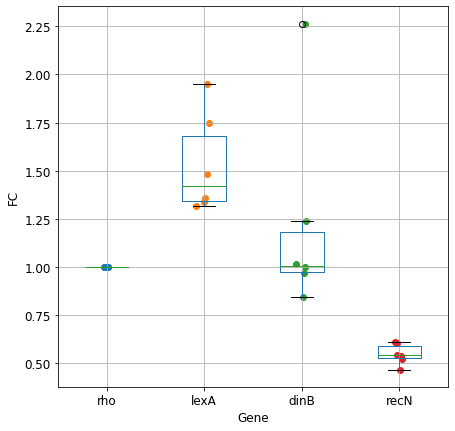

In [84]:
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize =(7, 7))
df = pd.DataFrame({"rho": list(rho), "lexA": list(lexa), "dinB": list(dinb), 'recN': list(recn)})
df.boxplot()
for i, d in enumerate(df):
    y = df[d]
    x = np.random.normal(i + 1, 0.04, len(y))
    plt.scatter(x, y)
plt.xlabel('Gene')
plt.ylabel('FC')
plt.show()

In [66]:
for i, d in enumerate(df):
    print(i,d)

0 rho
1 lexA
2 dinB
3 recN


ValueError: x and y must be the same size

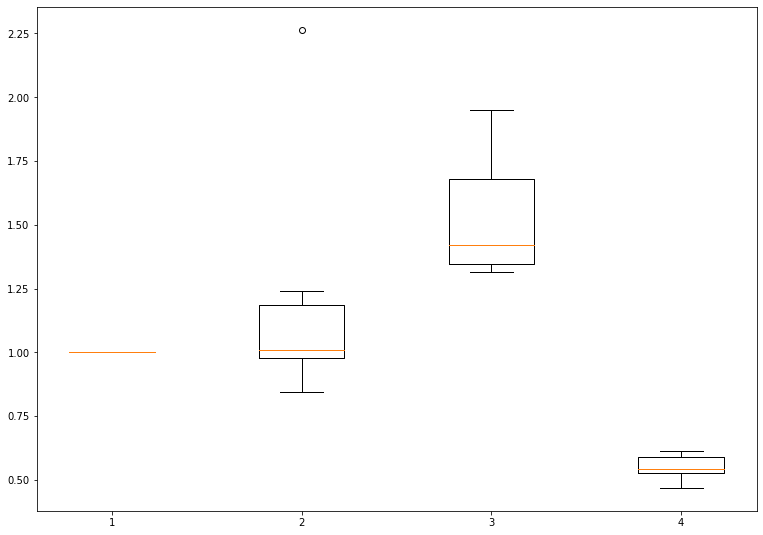

In [62]:
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(my_list)
y = rho
x = 'rho'
plt.scatter(x, y, 'r')
 
# show plot
plt.show()